In [34]:
import pandas as pd
import os
os.chdir("/home/robbe/ionbot")
import OxiAnalysis as OA
import warnings; warnings.simplefilter('ignore')

In [35]:
old = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD004713/quant/QuantifiedPeptides.tsv", sep="\t")
young = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD010469/quant/QuantifiedPeptides.tsv", sep="\t")

In [36]:
old

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_1DLC120314QE_RRAG_006_rep1,Intensity_1DLC120314QE_RRAG_006_rep2,Intensity_1DLC121414QE_RRAG_011_rep1,Intensity_1DLC121414QE_RRAG_011_rep2,Intensity_1DLC121414QE_RRAG_014_rep1,...,Detection Type_1DLC111215QE_RRAG_UP_#25_rep1,Detection Type_1DLC111215QE_RRAG_UP_#28_rep1,Detection Type_1DLC111215QE_RRAG_UP_#28_rep2,Detection Type_1DLC111215QE_RRAG_UP_#6B_rep1,Detection Type_1DLC111215QE_RRAG_UP_#6B_rep2,Detection Type_1DLC111215QE_RRAG_UP_#14B_rep2,Detection Type_1DLC111215QE_RRAG_UP_#24B_rep1,Detection Type_1DLC111215QE_RRAG_UP_#24B_rep2,Detection Type_1DLC111215QE_RRAG_UP_#25B_rep1,Unnamed: 73
0,AAAAAAAAAKNGSSGKnan,AAAAAAAAAKNGSSGK,NaN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
1,AAAAAAGEAR0|[52]Guanidinyl[N-TERM],AAAAAAGEAR,NaN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
2,AAAATGTIFTFR10|[35]Oxidation[T],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
3,AAAATGTIFTFR11|[35]Oxidation[F],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
4,AAAATGTIFTFR11|[425]Dioxidation[F],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34813,YYYDGKDYIEFNKnan,YYYDGKDYIEFNK,ZA2G_HUMAN,NaN,NaN,17518552.5,1.704406e+07,698223.818457,426732.845736,2.333161e+06,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
34814,YYYFCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[4]c...,YYYFCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
34815,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[4]c...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
34816,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[4]c...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN


In [37]:
for i in [old, young]:
    i.drop(list(i.filter(regex = 'Detection Type|Unnamed')), axis = 1, inplace = True)

In [38]:
old = old[~old["Protein Groups"].str.contains("sp|", na=False, regex=False)]
young = young[~young["Protein Groups"].str.contains("sp|", na=False, regex=False)]

In [39]:
young.drop([col for col in young.columns if "PIS" in col], inplace=True, axis=1)
young.drop(list(young.filter(regex = r"V\d{2,4}")), axis = 1, inplace = True)
old.drop([col for col in old.columns if "UP" in col], inplace=True, axis=1)


In [40]:
old["Status"] = "old"
young["Status"] = "young"

In [41]:
cols = [col for col in old.columns if "Intensity" in col]
old = OA.quantile_transform(old, cols)

<Axes: ylabel='Density'>

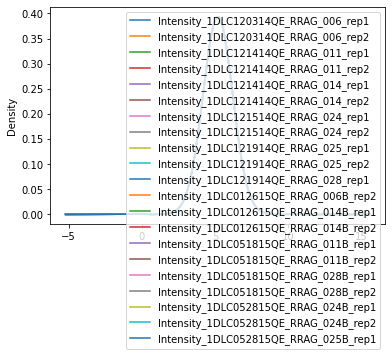

In [42]:
old[[col for col in cols]].plot.kde()

In [43]:
cols = [col for col in young.columns if "Intensity" in col]
young = OA.quantile_transform(young, cols)

<Axes: ylabel='Density'>

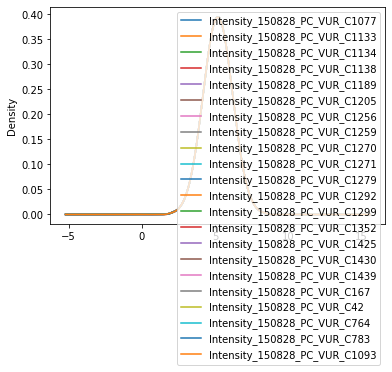

In [44]:
young[[col for col in cols]].plot.kde()

In [45]:
old

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_1DLC120314QE_RRAG_006_rep1,Intensity_1DLC120314QE_RRAG_006_rep2,Intensity_1DLC121414QE_RRAG_011_rep1,Intensity_1DLC121414QE_RRAG_011_rep2,Intensity_1DLC121414QE_RRAG_014_rep1,...,Intensity_1DLC012615QE_RRAG_014B_rep1,Intensity_1DLC012615QE_RRAG_014B_rep2,Intensity_1DLC051815QE_RRAG_011B_rep1,Intensity_1DLC051815QE_RRAG_011B_rep2,Intensity_1DLC051815QE_RRAG_028B_rep1,Intensity_1DLC051815QE_RRAG_028B_rep2,Intensity_1DLC052815QE_RRAG_024B_rep1,Intensity_1DLC052815QE_RRAG_024B_rep2,Intensity_1DLC052815QE_RRAG_025B_rep1,Status
0,AAAAAAAAAKNGSSGKnan,AAAAAAAAAKNGSSGK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
1,AAAAAAGEAR0|[52]Guanidinyl[N-TERM],AAAAAAGEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
2,AAAATGTIFTFR10|[35]Oxidation[T],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
3,AAAATGTIFTFR11|[35]Oxidation[F],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
4,AAAATGTIFTFR11|[425]Dioxidation[F],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.709265,4.005361,4.287160,NaN,4.394331,4.333612,NaN,NaN,NaN,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34813,YYYDGKDYIEFNKnan,YYYDGKDYIEFNK,ZA2G_HUMAN,NaN,NaN,6.451719,6.460099,5.076962,4.588022,5.895673,...,6.037677,5.991101,4.644801,4.463985,4.634611,5.964481,6.373688,6.315437,6.441959,old
34814,YYYFCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[4]c...,YYYFCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
34815,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[4]c...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
34816,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[4]c...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old


In [46]:
old = old.dropna(subset=[col for col in old.columns if "Intensity" in col], how="all")
young = young.dropna(subset=[col for col in young.columns if "Intensity" in col], how="all")

In [47]:
old.to_csv("oldquant.csv")
young.to_csv("youngquant.csv")

In [48]:
old

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_1DLC120314QE_RRAG_006_rep1,Intensity_1DLC120314QE_RRAG_006_rep2,Intensity_1DLC121414QE_RRAG_011_rep1,Intensity_1DLC121414QE_RRAG_011_rep2,Intensity_1DLC121414QE_RRAG_014_rep1,...,Intensity_1DLC012615QE_RRAG_014B_rep1,Intensity_1DLC012615QE_RRAG_014B_rep2,Intensity_1DLC051815QE_RRAG_011B_rep1,Intensity_1DLC051815QE_RRAG_011B_rep2,Intensity_1DLC051815QE_RRAG_028B_rep1,Intensity_1DLC051815QE_RRAG_028B_rep2,Intensity_1DLC052815QE_RRAG_024B_rep1,Intensity_1DLC052815QE_RRAG_024B_rep2,Intensity_1DLC052815QE_RRAG_025B_rep1,Status
4,AAAATGTIFTFR11|[425]Dioxidation[F],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.709265,4.005361,4.287160,NaN,4.394331,4.333612,NaN,NaN,NaN,old
5,AAAATGTIFTFR12|[425]Dioxidation[R],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.527527,4.509672,NaN,NaN,NaN,NaN,old
8,AAAATGTIFTFR9|[35]Oxidation[F],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
9,AAAATGTIFTFR9|[425]Dioxidation[F],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,NaN,NaN,4.527896,3.984667,NaN,...,NaN,NaN,NaN,4.531791,NaN,NaN,NaN,4.286794,NaN,old
10,AAAATGTIFTFRnan,AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,7.374960,7.366877,7.232313,7.205960,6.954737,...,7.140639,7.030990,6.533291,6.539974,6.722243,6.759258,6.526352,6.520742,6.497674,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34806,YYVDSVKnan,YYVDSVK,;HV307_HUMAN,NaN,NaN,6.337593,6.239276,6.560911,6.474751,6.197482,...,5.525869,6.198799,6.957459,6.969371,6.999377,6.852348,6.210302,6.659702,6.437705,old
34808,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,5.216081,5.261430,5.324903,5.200557,5.410863,...,5.626288,5.531998,6.020103,6.026486,5.377226,5.578195,6.067125,6.038913,5.841256,old
34810,YYWGGQYTWDMAK7|[35]Oxidation[Y],YYWGGQYTWDMAK,FIBB_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,4.677434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,old
34811,YYWGGQYTWDMAKnan,YYWGGQYTWDMAK,FIBB_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,5.844796,...,NaN,NaN,4.091688,4.202377,NaN,NaN,NaN,NaN,NaN,old


In [49]:
young

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_150828_PC_VUR_C1077,Intensity_150828_PC_VUR_C1133,Intensity_150828_PC_VUR_C1134,Intensity_150828_PC_VUR_C1138,Intensity_150828_PC_VUR_C1189,...,Intensity_150828_PC_VUR_C1352,Intensity_150828_PC_VUR_C1425,Intensity_150828_PC_VUR_C1430,Intensity_150828_PC_VUR_C1439,Intensity_150828_PC_VUR_C167,Intensity_150828_PC_VUR_C42,Intensity_150828_PC_VUR_C764,Intensity_150828_PC_VUR_C783,Intensity_150828_PC_VUR_C1093,Status
0,AAAAAAAAAAGAAGGRx|[488]DHP[C],AAAAAAAAAAGAAGGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.968659,...,NaN,NaN,6.783417,NaN,NaN,NaN,6.591562,NaN,NaN,young
1,AAAAAAAAAKNGSSGKnan,AAAAAAAAAKNGSSGK,;PHX2B_HUMAN,NaN,NaN,6.002359,3.955371,4.466957,4.602312,4.614285,...,3.470131,4.081589,NaN,5.664730,NaN,4.007765,2.904991,5.776934,5.893490,young
12,AAAAAVGNAVPCGARx|[9999535]Methyl_2H(3)13C(1)[N...,AAAAAVGNAVPCGAR,NaN,NaN,NaN,NaN,6.781757,6.597739,6.935755,6.678439,...,6.414149,6.470884,NaN,NaN,6.855566,6.445502,NaN,NaN,NaN,young
16,AAAATGTIFTFR10|[122]Formyl[T],AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,NaN,NaN,4.867404,4.465136,NaN,...,NaN,NaN,4.521736,NaN,5.323602,4.200055,NaN,3.875158,3.788118,young
18,AAAATGTIFTFRnan,AAAATGTIFTFR,IPSP_HUMAN,NaN,NaN,7.159449,7.775326,7.575757,7.730176,7.775246,...,7.444844,7.846300,7.253273,7.209618,8.076638,7.394275,7.512681,7.416234,7.083358,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63573,YYWGGQYTWDMAKnan,YYWGGQYTWDMAK,FIBB_HUMAN,NaN,NaN,5.563151,NaN,NaN,NaN,NaN,...,NaN,3.620732,NaN,5.647436,NaN,NaN,NaN,5.905592,5.262627,young
63582,YYYDGKDYIEFNKEIPAWVPFDPAAQITKnan,YYYDGKDYIEFNKEIPAWVPFDPAAQITK,ZA2G_HUMAN,NaN,NaN,4.928635,NaN,6.118572,NaN,NaN,...,NaN,NaN,NaN,5.398561,5.749550,6.827944,6.426689,4.086863,5.794594,young
63583,YYYDGKDYIEFNKnan,YYYDGKDYIEFNK,ZA2G_HUMAN,NaN,NaN,7.508831,6.859803,6.943723,NaN,7.064044,...,7.366426,7.364966,7.185726,6.986713,6.990928,NaN,7.125763,NaN,7.415630,young
63584,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[4]c...,YYYVCQYCPAGNWANR,;CRIS3_HUMAN,NaN,NaN,NaN,5.066454,NaN,5.530022,5.034075,...,NaN,4.960830,5.455172,5.842556,6.151940,5.530630,NaN,NaN,5.005612,young


In [50]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/Ageing_study_combined/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type|Unnamed')), axis = 1, inplace = True)
quant = quant[~quant["Protein Groups"].str.contains("sp|", na=False, regex=False)]

In [51]:
quant

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_150828_PC_VUR_C1077,Intensity_150828_PC_VUR_C1133,Intensity_150828_PC_VUR_C1134,Intensity_150828_PC_VUR_C1138,Intensity_150828_PC_VUR_C1189,...,Intensity_1DLC012615QE_RRAG_006B_rep2,Intensity_1DLC012615QE_RRAG_014B_rep1,Intensity_1DLC012615QE_RRAG_014B_rep2,Intensity_1DLC051815QE_RRAG_011B_rep1,Intensity_1DLC051815QE_RRAG_011B_rep2,Intensity_1DLC051815QE_RRAG_028B_rep1,Intensity_1DLC051815QE_RRAG_028B_rep2,Intensity_1DLC052815QE_RRAG_024B_rep1,Intensity_1DLC052815QE_RRAG_024B_rep2,Intensity_1DLC052815QE_RRAG_025B_rep1
0,AAAAAAAAAAGAAGGRx|[488]DHP[C],AAAAAAAAAAGAAGGR,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,528581.786458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAAAAAAAAKNGSSGKnan,AAAAAAAAAKNGSSGK,;PHX2B_HUMAN,NaN,NaN,2.241791e+06,184369.112305,143175.222656,427382.287519,343967.695312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAAAAAAAVSRR12|[981]glucosone[R],AAAAAAAAAVSRR,;ZFP91_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAAAAAAAGAFAGRR8|[1918]Carbonyl[A],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63957,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[4]c...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63958,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[6]C...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63959,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[100...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63960,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[6]C...,YYYVCQYCPAGNWANR,;CRIS3_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
cols = [col for col in quant.columns if "Intensity" in col]
quant = OA.quantile_transform(quant, cols)

<Axes: ylabel='Density'>

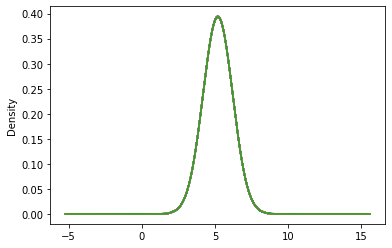

In [53]:
quant[cols].plot.kde(legend=False)

<Axes: >

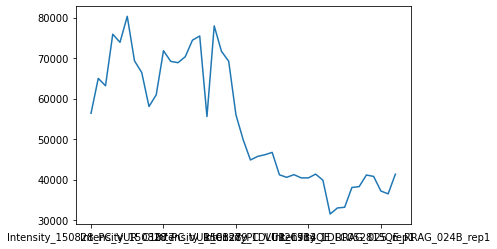

In [54]:
quant[cols].sum().plot()

In [55]:
quant[cols] = quant[cols].transform(lambda x: x/x.sum())

In [56]:
quant

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_150828_PC_VUR_C1077,Intensity_150828_PC_VUR_C1133,Intensity_150828_PC_VUR_C1134,Intensity_150828_PC_VUR_C1138,Intensity_150828_PC_VUR_C1189,...,Intensity_1DLC012615QE_RRAG_006B_rep2,Intensity_1DLC012615QE_RRAG_014B_rep1,Intensity_1DLC012615QE_RRAG_014B_rep2,Intensity_1DLC051815QE_RRAG_011B_rep1,Intensity_1DLC051815QE_RRAG_011B_rep2,Intensity_1DLC051815QE_RRAG_028B_rep1,Intensity_1DLC051815QE_RRAG_028B_rep2,Intensity_1DLC052815QE_RRAG_024B_rep1,Intensity_1DLC052815QE_RRAG_024B_rep2,Intensity_1DLC052815QE_RRAG_025B_rep1
0,AAAAAAAAAAGAAGGRx|[488]DHP[C],AAAAAAAAAAGAAGGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAAAAAAAAKNGSSGKnan,AAAAAAAAAKNGSSGK,;PHX2B_HUMAN,NaN,NaN,0.000106,0.00006,0.00007,0.000059,0.000062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAAAAAAAVSRR12|[981]glucosone[R],AAAAAAAAAVSRR,;ZFP91_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAAAAAAGAFAGRR8|[1918]Carbonyl[A],AAAAAAAAGAFAGRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63957,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[4]c...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63958,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[6]C...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63959,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[100...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63960,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[6]C...,YYYVCQYCPAGNWANR,;CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
quant.to_csv("Ageing_combined.csv")